# Project: Classification of Breast Tumors with Random Forest

#### Objective

Develop a machine learning model capable of classifying breast tumors as malignant or benign with high accuracy, using the Random Forest algorithm.
The idea is to show how an ensemble model can be applied to health problems, helping to detect breast cancer early.

#### Context
Breast cancer is one of the leading causes of death among women worldwide. Early detection is essential to increase the chances of effective treatment. This project uses the Breast Cancer Wisconsin dataset, which is widely used in the scientific community to test classification models.

#### Project stages
- Data collection and loading — use of scikit-learn's load_breast_cancer dataset.
- Exploratory analysis — visualization of distributions and correlations between variables.
- Training/testing split — 70% of data for training, 30% for testing.
- Model training — application of Random Forest with 100 trees.
- Model evaluation — calculation of accuracy, precision, recall and F1-score.
- Interpretation of results — identification of the most important variables.
- Conclusions — analysis of the impact of variables and applicability of the model.

#### Results
Accuracy: 97.07% on the test set. The model showed high recall for malignant tumors, reducing the risk of false negatives.

#### Main variables for forecasting
Characteristics related to the shape and size of the tumor, such as **mean concave points**, **worst concave points** and **worst area**.

#### Meaning of columns
The dataset has 30 numerical variables derived from the digital analysis of images of breast masses obtained by biopsy. Each variable represents a geometric or textural characteristic of the tumor cell.
The measurements were calculated in three ways:

- mean
- if (standard error)
- worst (highest observed value)

##### Main columns:

1. radius — average distance from the center to the perimeter of the tumor.

2. texture — variation in the gray intensity of the image.

3. perimeter — length of the tumor contour.

4. area — area occupied by the tumor.

5. smoothness — variation in the length of the rays, indicating surface irregularity.

6. compactness — relationship between the perimeter and the area, measuring compactness.

7. concavity — degree of concavity in parts of the contour.

8. concave points — number of concave points in the contour.

9. symmetry — symmetry of form.

10. fractal dimension — contour complexity.

The set also includes the target variable:

- 0 → Malignant

- 1 → Benign

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [86]:
data_raw = load_breast_cancer()
data = pd.DataFrame(data_raw.data, columns=data_raw.feature_names)
data["target"] = data_raw.target


X = data.drop(columns=["target"])
y = data["target"]

data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

model = RandomForestClassifier(
    n_estimators = 100,
    max_features = 'sqrt',
    random_state = 42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [90]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nRanking Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9707602339181286

Ranking Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [113]:
importance = pd.Series(model.feature_importances_,
                       index= x.columns)

top_5 = pd.DataFrame(importance.sort_values(ascending=False).head(5), columns = ['Importance'])
top_5

,Importance
mean concave points,0.141934
worst concave points,0.127136
worst area,0.118217
mean concavity,0.080557
worst radius,0.077975


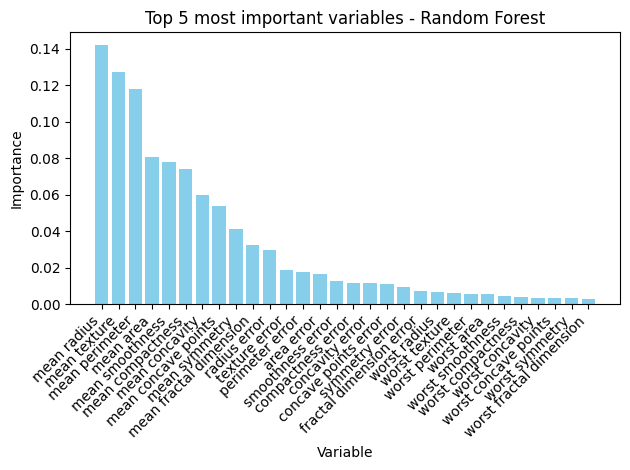

In [141]:
plt.bar(importance.index, 
        importance.sort_values(ascending=False), 
        color="skyblue")

plt.xlabel("Variable")
plt.ylabel("Importance")
plt.title("Top 5 most important variables - Random Forest")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()